In [1]:
# 导入需要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime

In [2]:
# 忽略报错
import warnings
warnings.filterwarnings("ignore")

# 中文
plt.rcParams['font.family'] = ['Arial Unicode MS'] 

In [3]:
# 加载用户画像数据
user_info = pd.read_csv("/Users/Yasmine/Desktop/小灶数据科学竞赛项目/data/data_format1/user_info_format1.csv")

In [4]:
# user_info概览
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int64
age_range    421953 non-null float64
gender       417734 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [5]:
# user_info数据集大小
user_info.shape

(424170, 3)

In [6]:
# user_info缺失值情况
user_info.isnull().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

- age_range，gender存在缺失值

In [7]:
# 复制user_info数据集，对age_range和gender分别进行中位数和众数填充
user_info_copy=user_info.copy()
user_info_copy.age_range.fillna(user_info_copy.age_range.median(), inplace=True)
user_info_copy.gender.fillna(user_info_copy.gender.mode()[0], inplace=True)

In [8]:
# 检查
user_info_copy.isnull().sum()

user_id      0
age_range    0
gender       0
dtype: int64

In [9]:
# user_info各字段描述性特征
user_info_copy.describe()

,user_id,age_range,gender
count,424170.000000,424170.000000,424170.000000
mean,212085.500000,2.930627,0.336002
std,122447.476178,1.937900,0.521790
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


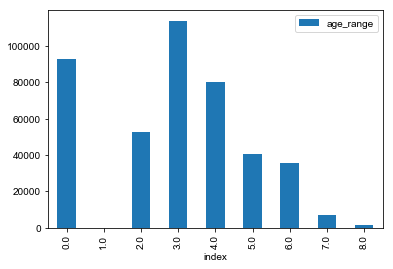

In [10]:
# 可视化-各年龄层人数（填充缺失值后）
user_info_copy.age_range.value_counts().reset_index().sort_values(by='index').set_index('index').plot(kind='bar')

- 缺少[<18]的人群，多数集中在[25-29]区间

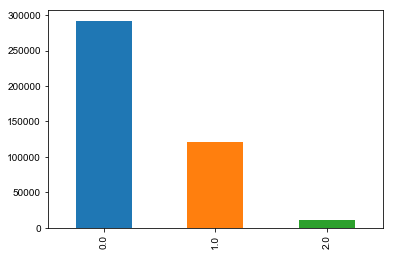

In [11]:
# 可视化-性别分布（填充缺失值后）
user_info_copy.gender.value_counts().plot(kind='bar')

- 女性居多

In [12]:
# 加载用户日志数据
user_log = pd.read_csv("/Users/Yasmine/Desktop/小灶数据科学竞赛项目/data/data_format1/user_log_format1.csv")

In [13]:
# user_log概览
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [14]:
# user_log数据大小
user_log.shape

(54925330, 7)

In [15]:
# user_log各字段情况
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        int64
item_id        int64
cat_id         int64
seller_id      int64
brand_id       float64
time_stamp     int64
action_type    int64
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [16]:
# user_log缺失值情况
user_log.isnull().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

- 仅brand_id字段存在缺失值

In [17]:
# 复制user_log
user_log_copy = user_log.copy()

In [18]:
# 将user_log和user_info用user_id连接得到data_info_log
data_info_log = pd.merge(user_log_copy,user_info_copy, on=['user_id'])

In [19]:
# data_info_log概览
data_info_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,328862,323294,833,2882,2661.0,829,0,6.0,1.0
1,328862,844400,1271,2882,2661.0,829,0,6.0,1.0
2,328862,575153,1271,2882,2661.0,829,0,6.0,1.0
3,328862,996875,1271,2882,2661.0,829,0,6.0,1.0
4,328862,1086186,1271,1253,1049.0,829,0,6.0,1.0


In [20]:
# 将data_info_log复制，将action_type变为哑变量，添加到data_info_log【行为维度大宽表】
data_info_log_copy = data_info_log.copy()
data_info_log_copy = data_info_log.join(pd.get_dummies(data_info_log.action_type, prefix='action'))
data_info_log_copy.head()


,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,action_0,action_1,action_2,action_3
0,328862,323294,833,2882,2661.0,829,0,6.0,1.0,1,0,0,0
1,328862,844400,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0
2,328862,575153,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0
3,328862,996875,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0
4,328862,1086186,1271,1253,1049.0,829,0,6.0,1.0,1,0,0,0


# 用户维度

In [21]:
# 统计用户维度各行为次数
user_action_sum = data_info_log_copy[['user_id','action_0','action_1','action_2','action_3']].groupby('user_id').agg(np.sum)


In [22]:
# 用户行为次数描述性统计
user_action_sum.describe()


,action_0,action_1,action_2,action_3
count,424170.000000,424170.000000,424170.000000,424170.000000
mean,114.460506,0.180942,7.761379,7.086128
std,172.975111,0.885851,7.916426,19.944983
min,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,3.000000,0.000000
50%,63.000000,0.000000,5.000000,1.000000
75%,132.000000,0.000000,10.000000,6.000000
max,13713.000000,27.000000,905.000000,1834.000000


- 与下图结合，思考如何定义活跃用户（采用2/8定理）

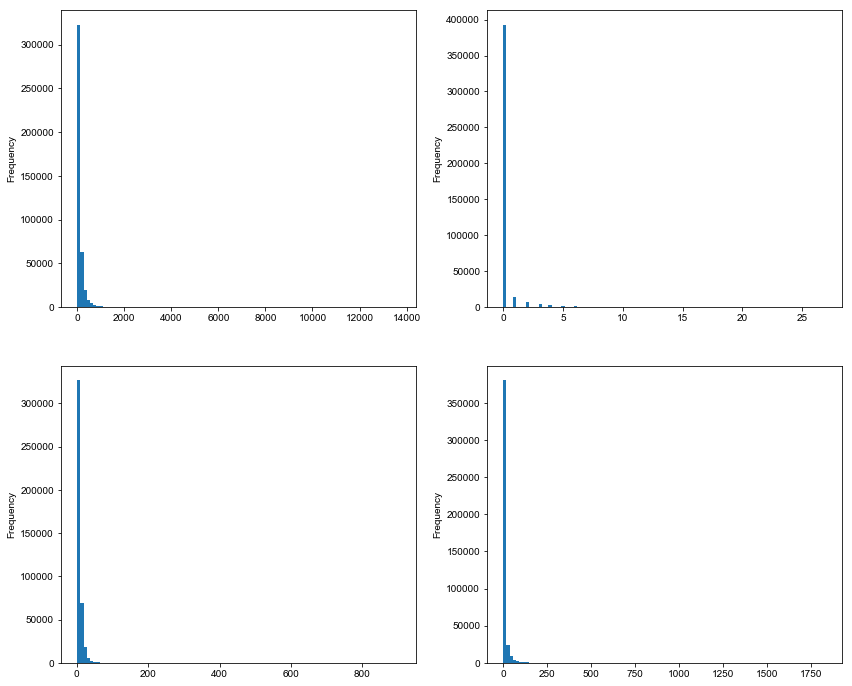

In [23]:
# 可视化-用户各行为次数分布
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
user_action_sum.action_0.plot(kind='hist', bins=100)

plt.subplot(2,2,2)
user_action_sum.action_1.plot(kind='hist', bins=100)

plt.subplot(2,2,3)
user_action_sum.action_2.plot(kind='hist', bins=100)

plt.subplot(2,2,4)
user_action_sum.action_3.plot(kind='hist', bins=100)

In [24]:
# 计算用户维度各行为距2020-11-11天数，并添加到data_info_log_copy
data_info_log_copy['days'] = data_info_log_copy['time_stamp'].apply(lambda x:(datetime.strptime('1111', '%m%d')-datetime.strptime(str(x), '%m%d')).days)

In [25]:
data_info_log_copy.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,action_0,action_1,action_2,action_3,days
0,328862,323294,833,2882,2661.0,829,0,6.0,1.0,1,0,0,0,74
1,328862,844400,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0,74
2,328862,575153,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0,74
3,328862,996875,1271,2882,2661.0,829,0,6.0,1.0,1,0,0,0,74
4,328862,1086186,1271,1253,1049.0,829,0,6.0,1.0,1,0,0,0,74


In [36]:
# 统计用户维度行为各行为时间距11-11均值、最小值和最大值
days_sum = pd.DataFrame(pd.pivot_table(data_info_log_copy, index='user_id', columns='action_type', values='days', aggfunc=[np.mean, np.min, np.max]))

In [48]:
# 修改days_sum列名
days_sum.columns = ['days_0_mean', 'days_1_mean', 'days_2_mean', 'days_3_mean','days_0_min', 'days_1_min', 'days_2_min', 'days_3_min','days_0_max', 'days_1_max', 'days_2_max', 'days_3_max']

In [49]:
# 【用户维度表】users_sum
users_sum = user_action_sum.join(data_info_log_copy[['age_range', 'gender']])
users_sum = users_sum.join(days_sum)

In [60]:
# 统计用户维度每个用户点击、加入购物车、收藏、购买的item数量、cat数量和seller数量，分组去重计数
data_nums = data_info_log_copy[['user_id', 'item_id', 'cat_id', 'seller_id', 'brand_id']].groupby('user_id').agg(pd.Series.nunique)


In [64]:
data_nums.columns = ['num_item', 'cat_num', 'seller_num', 'brand_num']

In [70]:
# data_nums加进用户表users_sum
users_sum = users_sum.join(data_nums)
users_sum.head()

,action_0,action_1,action_2,action_3,age_range,gender,days_0_mean,days_1_mean,days_2_mean,days_3_mean,...,days_2_min,days_3_min,days_0_max,days_1_max,days_2_max,days_3_max,num_item,cat_num,seller_num,brand_num
user_id,,,,,,,,,,,,,,,,,,,,,
1,27.0,0.0,6.0,0.0,6.0,1.0,14.777778,NaN,8.666667,NaN,...,0.0,NaN,33.0,NaN,31.0,NaN,12,6,9,9.0
2,47.0,0.0,14.0,2.0,6.0,1.0,111.234043,NaN,48.357143,1.5,...,0.0,0.0,168.0,NaN,138.0,3.0,43,14,14,15.0
3,63.0,0.0,4.0,1.0,6.0,1.0,34.238095,NaN,110.500000,2.0,...,0.0,2.0,137.0,NaN,179.0,2.0,45,19,23,22.0
4,49.0,0.0,1.0,0.0,6.0,1.0,83.612245,NaN,0.000000,NaN,...,0.0,NaN,168.0,NaN,0.0,NaN,28,13,12,12.0
5,150.0,0.0,13.0,10.0,6.0,1.0,63.013333,NaN,59.384615,70.2,...,0.0,0.0,175.0,NaN,175.0,176.0,87,40,56,59.0


In [71]:
# 用户整体行为情况
users_sum.describe()

,action_0,action_1,action_2,action_3,age_range,gender,days_0_mean,days_1_mean,days_2_mean,days_3_mean,...,days_2_min,days_3_min,days_0_max,days_1_max,days_2_max,days_3_max,num_item,cat_num,seller_num,brand_num
count,424170.000000,424170.000000,424170.000000,424170.000000,424170.000000,424170.000000,423862.000000,31044.000000,424170.000000,233428.000000,...,424170.0,233428.000000,423862.000000,31044.000000,424170.000000,233428.000000,424170.000000,424170.000000,424170.000000,424170.000000
mean,114.460506,0.180942,7.761379,7.086128,4.407377,0.443365,49.276473,26.680304,41.325431,54.526118,...,0.0,22.321491,138.888358,37.027380,97.216885,100.345186,75.208383,22.501895,33.143942,32.788038
std,172.975111,0.885851,7.916426,19.944983,1.216267,0.618495,31.862519,40.534735,34.218527,44.369989,...,0.0,41.787612,46.816559,51.825818,68.555237,68.215391,102.065452,16.750060,33.840593,33.019187
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,0.000000,3.000000,0.000000,4.000000,0.000000,23.666667,1.000000,7.500000,14.625000,...,0.0,0.000000,126.000000,2.000000,22.000000,25.000000,22.000000,11.000000,13.000000,13.000000
50%,63.000000,0.000000,5.000000,1.000000,4.000000,0.000000,46.253067,7.000000,38.750000,49.000000,...,0.0,2.000000,160.000000,9.000000,115.000000,117.000000,44.000000,18.000000,23.000000,23.000000
75%,132.000000,0.000000,10.000000,6.000000,5.000000,1.000000,70.486293,35.000000,67.000000,82.461538,...,0.0,19.000000,171.000000,57.000000,163.000000,167.000000,89.000000,29.000000,41.000000,41.000000
max,13713.000000,27.000000,905.000000,1834.000000,8.000000,2.000000,175.000000,184.000000,165.529412,184.000000,...,0.0,184.000000,175.000000,184.000000,184.000000,184.000000,6324.000000,412.000000,1683.000000,1609.000000


In [72]:
# 不同年龄层、性别的用户行为情况
users_sum.groupby('age_range').mean()

,action_0,action_1,action_2,action_3,gender,days_0_mean,days_1_mean,days_2_mean,days_3_mean,days_0_min,...,days_2_min,days_3_min,days_0_max,days_1_max,days_2_max,days_3_max,num_item,cat_num,seller_num,brand_num
age_range,,,,,,,,,,,,,,,,,,,,,
0.0,115.961712,0.179379,7.866672,7.100166,0.227012,49.421626,27.170040,42.104358,55.181690,2.120543,...,0.0,22.790669,139.346325,37.487705,98.472415,101.180257,75.912044,22.685333,33.427269,33.114637
2.0,117.014770,0.220678,7.478714,7.291051,0.388358,49.308053,23.467524,41.474507,57.281231,1.726325,...,0.0,24.510204,141.396177,36.117021,96.926151,103.877551,76.658558,22.630756,33.458732,33.064292
3.0,113.721351,0.182528,7.821139,6.999832,0.538375,49.554593,27.610050,41.442816,54.562717,2.198056,...,0.0,22.833722,139.171527,37.951284,97.329872,99.861317,74.906427,22.557297,33.093853,32.735543
4.0,114.349708,0.180445,7.754488,7.082827,0.513454,49.257855,26.068115,41.243705,54.622256,2.140054,...,0.0,22.292409,138.876055,36.507255,97.096542,100.544359,75.095721,22.483833,33.061810,32.707550
5.0,114.401510,0.179343,7.746940,7.105035,0.410558,49.240881,27.168725,41.367741,54.285242,2.166187,...,0.0,22.189240,138.786469,37.267100,97.253360,100.074013,75.158448,22.459113,33.168745,32.809576
6.0,115.050011,0.181615,7.762120,7.066177,0.292334,49.209246,26.591234,41.239486,54.354283,2.200342,...,0.0,22.166988,138.892613,36.978965,97.184281,100.161577,75.594109,22.581201,33.284356,32.921508
7.0,114.778360,0.192990,7.766289,7.439936,0.414485,49.290015,29.120809,41.239733,55.895049,2.449039,...,0.0,23.337197,138.319744,40.687129,96.899651,101.826923,76.007417,22.392379,33.444008,33.081443
8.0,112.272425,0.219744,7.639298,6.954912,0.062174,49.102275,30.028908,41.836606,53.543586,2.296630,...,0.0,20.390925,138.469388,40.174419,98.114855,99.142234,74.864262,22.579022,33.132416,32.816327


- 不同年龄层间用户行为表现有差异

In [73]:
users_sum.groupby('gender').mean()

,action_0,action_1,action_2,action_3,age_range,days_0_mean,days_1_mean,days_2_mean,days_3_mean,days_0_min,...,days_2_min,days_3_min,days_0_max,days_1_max,days_2_max,days_3_max,num_item,cat_num,seller_num,brand_num
gender,,,,,,,,,,,,,,,,,,,,,
0.0,114.327893,0.182411,7.756305,7.071167,4.448835,49.255617,26.722537,41.295916,54.509452,2.169904,...,0.0,22.301011,138.867018,36.957806,97.147899,100.295460,75.131617,22.464988,33.062130,32.707222
1.0,114.756146,0.178995,7.770547,7.141343,4.368352,49.280640,26.360385,41.399668,54.535695,2.161330,...,0.0,22.384348,138.872689,36.819179,97.355829,100.354976,75.359232,22.557156,33.286755,32.928420
2.0,114.340755,0.176248,7.766508,6.973532,4.202786,49.449482,27.752517,41.260528,54.636629,2.129797,...,0.0,22.223866,139.155729,38.644175,97.221890,100.760701,75.231026,22.591024,33.249436,32.895377


- 不同性别用户行为表现差异不大

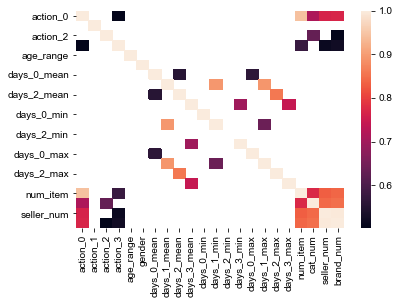

In [121]:
# 变量间相关性矩阵
users_sum.corr()[(users_sum.corr()>=0.5) | (users_sum.corr()<=-0.5)]
sns.heatmap(users_sum.corr()[(users_sum.corr()>=0.5) | (users_sum.corr()<=-0.5)])

# 店铺维度

In [77]:
# 统计店铺维度各行为pv和uv
seller_pv = data_info_log_copy[['seller_id','action_0','action_1','action_2','action_3']].groupby('seller_id').sum()
seller_pv.columns = ['action_0_pv', 'action_1_pv', 'action_2_pv', 'action_3_pv']

seller_uv = pd.DataFrame(pd.pivot_table(data_info_log_copy, index='seller_id', columns='action_type', values='user_id', aggfunc=pd.Series.nunique))
seller_uv.columns = ['action_0_uv', 'action_1_uv', 'action_2_uv', 'action_3_uv'] 
seller_uv.fillna(0, inplace=True)

In [89]:
# 计算seller_uv各行为占比
seller_uv['action_0_pt'] = seller_uv['action_0_uv']/seller_uv.apply(np.sum, axis=1)
seller_uv['action_1_pt'] = seller_uv['action_1_uv']/seller_uv.apply(np.sum, axis=1)
seller_uv['action_2_pt'] = seller_uv['action_2_uv']/seller_uv.apply(np.sum, axis=1)
seller_uv['action_3_pt'] = seller_uv['action_3_uv']/seller_uv.apply(np.sum, axis=1)

In [94]:
# 计算seller_uv各层转化率
seller_uv['1->0'] = seller_uv['action_1_uv']/seller_uv['action_0_uv']
seller_uv['2->0'] = seller_uv['action_2_uv']/seller_uv['action_0_uv']
seller_uv['3->0'] = seller_uv['action_3_uv']/seller_uv['action_0_uv']

In [95]:
# 汇总进sellers_sum
sellers_sum = seller_pv.join(seller_uv)

In [96]:
sellers_sum.head()

,action_0_pv,action_1_pv,action_2_pv,action_3_pv,action_0_uv,action_1_uv,action_2_uv,action_3_uv,action_0_pt,action_1_pt,action_2_pt,action_3_pt,1->0,2->0,3->0
seller_id,,,,,,,,,,,,,,,
1,308236.0,444.0,17705.0,12755.0,29251.0,265.0,7666.0,4965.0,0.694023,0.006287,0.181884,0.117800,0.009060,0.262077,0.169738
2,2030.0,8.0,189.0,144.0,902.0,6.0,161.0,127.0,0.754181,0.005014,0.134530,0.106108,0.006652,0.178492,0.140798
3,2399.0,4.0,67.0,175.0,1103.0,4.0,65.0,150.0,0.834342,0.003024,0.049137,0.113388,0.003626,0.058930,0.135993
4,2646.0,2.0,294.0,164.0,1384.0,2.0,201.0,153.0,0.795402,0.001149,0.115464,0.087885,0.001445,0.145231,0.110549
5,7483.0,9.0,144.0,556.0,3535.0,9.0,120.0,458.0,0.857593,0.002183,0.029106,0.111087,0.002546,0.033946,0.129562


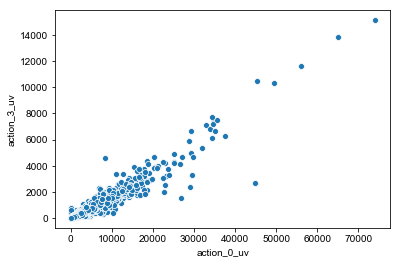

In [114]:
sns.scatterplot(x='action_0_uv', y='action_3_uv', data=sellers_sum)

In [124]:
# 变量间相关性矩阵
sellers_sum.corr()[(sellers_sum.corr()>=0.5) | (sellers_sum.corr()<=-0.5)]

,action_0_pv,action_1_pv,action_2_pv,action_3_pv,action_0_uv,action_1_uv,action_2_uv,action_3_uv,action_0_pt,action_1_pt,action_2_pt,action_3_pt,1->0,2->0,3->0
action_0_pv,1.000000,0.877935,0.712580,0.944093,0.874930,0.860424,0.710155,0.907076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_1_pv,0.877935,1.000000,0.779656,0.879083,0.884147,0.992358,0.798052,0.893426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_2_pv,0.712580,0.779656,1.000000,0.694414,0.767721,0.778391,0.965850,0.750261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_3_pv,0.944093,0.879083,0.694414,1.000000,0.872588,0.867108,0.701911,0.943938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_0_uv,0.874930,0.884147,0.767721,0.872588,1.000000,0.901981,0.804088,0.956075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_1_uv,0.860424,0.992358,0.778391,0.867108,0.901981,1.000000,0.812563,0.904147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_2_uv,0.710155,0.798052,0.965850,0.701911,0.804088,0.812563,1.000000,0.785489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_3_uv,0.907076,0.893426,0.750261,0.943938,0.956075,0.904147,0.785489,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_0_pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.861235,NaN,NaN,-0.631288,NaN
action_1_pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


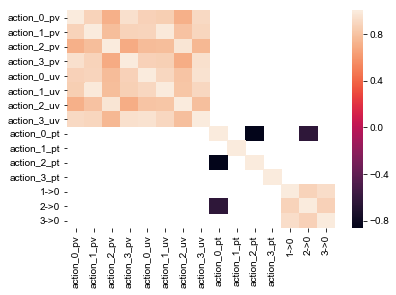

In [123]:
sns.heatmap(sellers_sum.corr()[(sellers_sum.corr()>=0.5) | (sellers_sum.corr()<=-0.5)])

In [26]:
# 保存数据到文件夹
data_info_log_copy.to_hdf("/Users/Yasmine/Desktop/小灶数据科学竞赛项目/data/data_info_log.h5", 'log')   # 用户行为维度大宽表


In [75]:
users_sum.to_hdf("/Users/Yasmine/Desktop/小灶数据科学竞赛项目/data/users_sum.h5", 'user')     #用户维度表

In [97]:
sellers_sum.to_hdf("/Users/Yasmine/Desktop/小灶数据科学竞赛项目/data/sellers_sum.h5", 'seller')